# Initial Cleaning/ setup procedures


#### _1. Import libraries and set path to pkl file_

In [1]:
import pandas as pd
import os
from datetime import date, timedelta
import datetime
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
pkl_loc = os.path.join(ROOT_DIR, 'data', 'data','weatherAA.pkl')
pkl_loc

'C:\\Users\\paull\\OneDrive - Scandinavian Tobacco Group A S\\Documents\\GitHub\\Weatherman\\data\\data\\weatherAA.pkl'

### _2. Create dataframe and run basic eda_

In [2]:
df = pd.read_pickle(pkl_loc)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146330 entries, 2006-01-01 00:00:00 to 2022-10-07 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    145799 non-null  float64
 1   dwpt    145582 non-null  float64
 2   rhum    145582 non-null  float64
 3   prcp    133375 non-null  float64
 4   snow    0 non-null       float64
 5   wdir    122688 non-null  float64
 6   wspd    145397 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    141933 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    6519 non-null    float64
dtypes: float64(11)
memory usage: 13.4 MB


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,145799.000,145582.000,145582.000,133375.000,0.000,122688.000,145397.000,0.000,141933.000,0.000,6519.000
mean,9.490,4.209,72.401,0.084,NaN,199.981,11.874,NaN,1016.638,NaN,5.066
std,11.203,10.452,18.049,0.572,NaN,101.271,8.347,NaN,7.472,NaN,3.523
min,-32.200,-34.900,15.000,0.000,NaN,0.000,0.000,NaN,980.300,NaN,1.000
25%,0.600,-3.900,60.000,0.000,NaN,120.000,5.400,NaN,1012.100,NaN,3.000
50%,10.000,4.400,75.000,0.000,NaN,220.000,11.200,NaN,1016.500,NaN,5.000
75%,18.900,13.200,87.000,0.000,NaN,280.000,16.600,NaN,1021.300,NaN,5.000
max,38.900,27.100,100.000,34.300,NaN,360.000,63.000,NaN,1045.800,NaN,26.000


In [4]:
df.shape

(146330, 11)

### _3. Remove unneeded columns_


In [5]:
df.drop(columns=['snow', 'wpgt','tsun','coco'],inplace=True)
df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500


In [6]:
df.reset_index(inplace=True)

### _5. Difference in Time_

In [7]:
df=df[df['time']<'2022-09-22 23:00:00'] #matching end of existing data
dftime=df.copy(deep=True)

In [8]:
dftime['timediff']=dftime['time'].diff(periods=1) #difference for hours

In [9]:
dftime['timediff']=dftime['timediff']/pd.Timedelta(hours=1) #converted to hour int

In [10]:

dftime[dftime['timediff']>10]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
2355,2006-04-10 17:00:00,13.900,1.200,42.000,0.000,180.000,13.000,NaN,38.000
6893,2006-10-18 06:00:00,11.100,9.400,89.000,NaN,220.000,11.200,NaN,27.000
38008,2010-05-09 20:00:00,12.200,-3.200,34.000,0.000,280.000,20.500,NaN,29.000
38663,2010-06-06 20:00:00,19.400,12.200,63.000,0.000,280.000,13.000,1007.000,18.000
39795,2010-07-24 21:00:00,29.400,20.600,59.000,0.000,300.000,20.500,1010.600,22.000
56859,2012-07-06 18:00:00,36.100,21.200,42.000,NaN,NaN,0.000,1013.700,33.000
56866,2012-07-07 12:00:00,30.000,22.200,63.000,0.000,260.000,11.200,1012.000,12.000
61586,2013-01-20 20:00:00,-5.600,-14.900,48.000,0.000,300.000,25.900,NaN,14.000
73919,2014-06-19 12:00:00,19.400,17.700,90.000,0.000,30.000,11.200,NaN,16.000
75804,2014-09-08 15:00:00,21.700,11.700,53.000,0.000,100.000,14.800,NaN,63.000


### _6. Null and Precep Count_

In [101]:
dftime[dftime['timediff']>1]

#lot of null for prcp


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
119,2006-01-06 00:00:00,0.600,-3.300,75.000,0.000,340.000,22.300,NaN,2.000
2355,2006-04-10 17:00:00,13.900,1.200,42.000,0.000,180.000,13.000,NaN,38.000
4538,2006-07-10 19:00:00,26.100,12.900,44.000,0.000,290.000,16.600,1013.200,4.000
4571,2006-07-12 07:00:00,22.800,21.800,94.000,0.000,230.000,18.400,1011.200,4.000
5081,2006-08-02 15:00:00,30.000,23.900,70.000,0.000,220.000,20.500,1010.900,3.000
...,...,...,...,...,...,...,...,...,...
129864,2020-11-13 04:00:00,NaN,NaN,NaN,0.000,NaN,NaN,NaN,13.000
130173,2020-11-26 12:00:00,11.000,10.100,94.000,NaN,280.000,19.000,NaN,12.000
130177,2020-11-26 17:00:00,10.000,8.100,88.000,NaN,270.000,19.000,NaN,2.000
130181,2020-11-26 22:00:00,NaN,NaN,NaN,0.000,NaN,NaN,NaN,2.000


In [12]:
dftime[dftime["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
26,2006-01-02 02:00:00,1.100,-1.100,85.000,0.300,NaN,11.200,1015.400,1.000
27,2006-01-02 03:00:00,1.100,-0.100,92.000,0.800,80.000,14.800,1015.100,1.000
29,2006-01-02 05:00:00,1.700,0.500,92.000,0.500,80.000,18.400,1014.200,1.000
30,2006-01-02 06:00:00,1.700,1.100,96.000,1.800,80.000,16.600,1013.800,1.000
31,2006-01-02 07:00:00,1.700,1.100,96.000,0.500,70.000,14.800,1013.500,1.000
...,...,...,...,...,...,...,...,...,...
146010,2022-09-17 21:00:00,27.800,15.500,47.000,0.100,250.000,16.600,1016.800,1.000
146048,2022-09-19 11:00:00,17.200,16.100,93.000,3.000,280.000,7.600,1012.100,1.000
146091,2022-09-21 06:00:00,17.000,15.300,90.000,1.100,200.000,11.000,1013.000,1.000
146092,2022-09-21 07:00:00,18.000,15.800,87.000,5.000,210.000,15.000,1012.000,1.000


In [13]:
#cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')
#df.to_pickle(cln_pkl_loc)


### _6. Merging in new time_

In [14]:
time_range = pd.date_range('2006-01-01 00:00:00', '2022-09-22 23:00:00', freq='H') ##creating time range

In [15]:
df_time=pd.DataFrame(time_range)

In [16]:
df_time.columns =['time']

In [17]:
df

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
1,2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2,2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
3,2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
4,2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...,...
146127,2022-09-22 18:00:00,16.000,4.400,46.000,0.000,340.000,20.000,1017.000
146128,2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
146129,2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
146130,2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000


In [18]:
df_time

,time
0,2006-01-01 00:00:00
1,2006-01-01 01:00:00
2,2006-01-01 02:00:00
3,2006-01-01 03:00:00
4,2006-01-01 04:00:00
...,...
146611,2022-09-22 19:00:00
146612,2022-09-22 20:00:00
146613,2022-09-22 21:00:00
146614,2022-09-22 22:00:00


In [19]:
df_updated=df_time.merge(df,left_on=['time'], right_on=['time'], how='left') #new df with nulls 

In [20]:
df_updated

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
1,2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2,2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
3,2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
4,2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...,...
146611,2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
146612,2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
146613,2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000
146614,2022-09-22 22:00:00,14.000,2.900,47.000,0.000,330.000,22.000,1019.000


### _7. Inputting missing values_

In [21]:
#dfinputt=df.drop(['station', 'time'], axis=1)
#dfinputt

In [22]:
#imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
#imputer.fit_transform(dfinputt)  I have decided KNN just isn't the best approach.  Its slow and this is time series data, it doesn't need to scan the entire dataframe looking for neighbors, we know what the "neighbors" are

In [23]:
df_updated.set_index('time', inplace=True)

In [24]:
df_updated

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...
2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000


In [104]:
dfint=df_updated.copy(deep=True)
#dfint=dfint.set_index('station')
#for column in dfint:
#        dfint[column]=dfint[column].interpolate(method='polynomial', order=2)
dfint['temp']=dfint['temp'].interpolate(method='polynomial', order=5)

In [105]:
dfint.drop(index=('2022-09-22 23:00:00'), inplace=True)
dfint.drop(index=('2006-01-01 00:00:00'), inplace=True)
dfint

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
2006-01-01 05:00:00,1.100,-0.100,92.000,0.000,240.000,16.600,1010.900
...,...,...,...,...,...,...,...
2022-09-22 18:00:00,16.000,4.400,46.000,0.000,340.000,20.000,1017.000
2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900


In [106]:
dfint.reset_index(inplace=True)
dfint[(dfint['time']>='2014-09-06') & (df['time']<='2014-09-08')].head(50)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres


In [125]:
dfint[(dfint['time']>='2006-04-09 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')].head(60)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
2351,2006-04-09 00:00:00,4.400,-5.100,50.000,0.000,330.000,16.600,1022.200
2352,2006-04-09 01:00:00,3.300,-4.900,55.000,0.000,340.000,11.200,1023.000
2353,2006-04-09 02:00:00,0.000,-3.900,75.000,0.000,NaN,0.000,1023.700
2354,2006-04-09 03:00:00,-2.200,-4.400,85.000,0.000,260.000,5.400,1023.600
2355,2006-04-09 04:00:00,-1.552,NaN,NaN,NaN,NaN,NaN,NaN
2356,2006-04-09 05:00:00,1.378,NaN,NaN,NaN,NaN,NaN,NaN
2357,2006-04-09 06:00:00,5.996,NaN,NaN,NaN,NaN,NaN,NaN
2358,2006-04-09 07:00:00,11.778,NaN,NaN,NaN,NaN,NaN,NaN
2359,2006-04-09 08:00:00,18.266,NaN,NaN,NaN,NaN,NaN,NaN
2360,2006-04-09 09:00:00,25.065,NaN,NaN,NaN,NaN,NaN,NaN


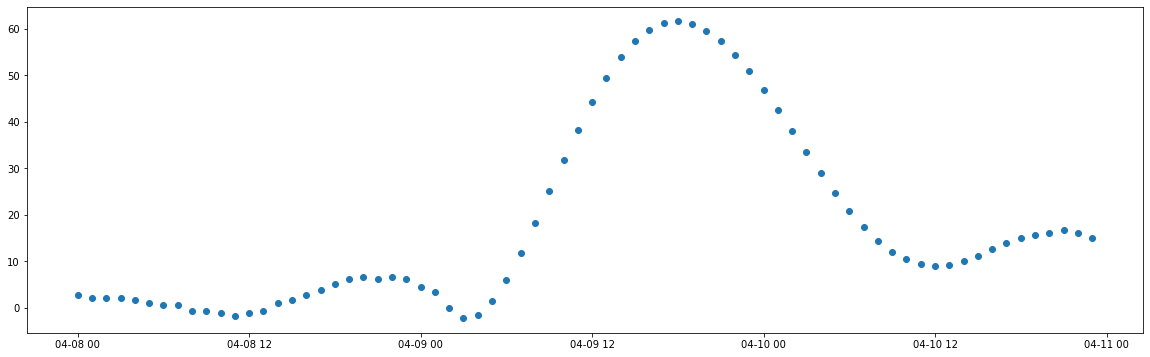

In [108]:

dfgraph=dfint[(dfint['time']>='2006-04-08 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')]
x= dfgraph['time']
y= dfgraph['temp']

figure(figsize=(20,6))
plt.scatter(x,y)
plt.show()


In [50]:
cln_pkl_loc = os.path.join(ROOT_DIR, 'data','AAcleaned.pkl')
dfint.to_pickle(cln_pkl_loc)


In [ ]:
#testing spline, actually I don't like it - the numbers are too smooth.  

#test2=dfint2[dfint2['station']=='0CNUO']
#for column in test2:
#    if column in ['station', 'time']:
#        None
#    else:
        #print(column)
#        test2[column]=test2[column].interpolate(method='spline', order=3)

In [ ]:
#test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

In [120]:
dfsarima=df[(df['time']>='2006-01-06 00:00:00') & (df['time']<='2006-04-09 03:00:00')]
dfsarima.set_index('time',inplace=True)

In [121]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(dfsarima['temp'], 
                                order = (1,1,1),
                                seasonal_order = (1,1,1,12),
                                enforce_stationarity = False,
                                enforce_invertibility = False)

C:\Users\paull\Anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\paull\Anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [122]:
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               temp   No. Observations:                 2236
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3075.080
Date:                            Sat, 08 Oct 2022   AIC                           6160.160
Time:                                    23:25:40   BIC                           6188.662
Sample:                                01-06-2006   HQIC                          6170.573
                                     - 04-09-2006                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6570      0.033     20.167      0.000       0.593       0.721
ma.L1         -0.3388      0.037   

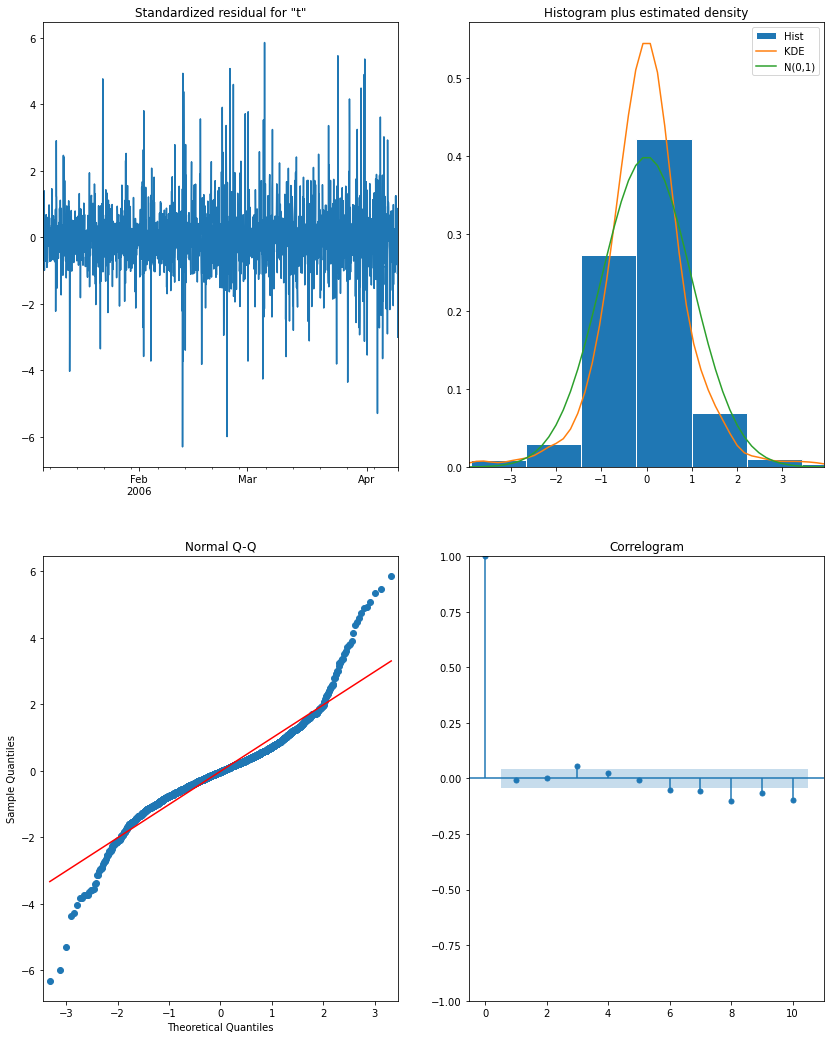

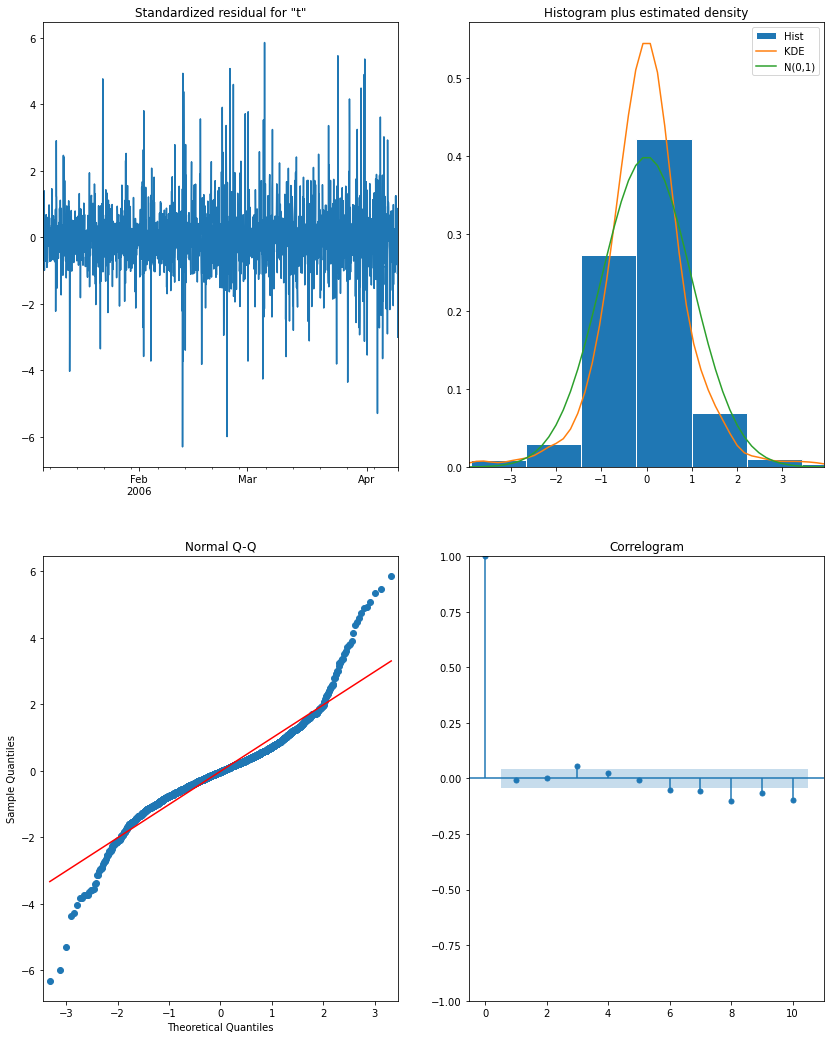

In [123]:
res.plot_diagnostics(figsize=(14,18))

In [129]:
forecast_values = res.get_forecast(steps=37)
pd.DataFrame(forecast_values.predicted_mean)

,predicted_mean
2006-04-09 04:00:00,-3.287
2006-04-09 05:00:00,-3.969
2006-04-09 06:00:00,-4.466
2006-04-09 07:00:00,-4.879
2006-04-09 08:00:00,-5.186
2006-04-09 09:00:00,-5.337
2006-04-09 10:00:00,-5.763
2006-04-09 11:00:00,-6.203
2006-04-09 12:00:00,-6.549
2006-04-09 13:00:00,-6.467


In [136]:
df_graph2=df[(df['time']>='2006-04-08 00:00:00') & (df['time']<='2006-04-10 23:00:00')][['time','temp']]
df_graph2.set_index('time',inplace=True)


In [137]:
df_graph2

,temp
time,
2006-04-08 00:00:00,2.800
2006-04-08 01:00:00,2.200
2006-04-08 02:00:00,2.200
2006-04-08 03:00:00,2.200
2006-04-08 04:00:00,1.700
2006-04-08 05:00:00,1.100
2006-04-08 06:00:00,0.600
2006-04-08 07:00:00,0.600
2006-04-08 08:00:00,-0.600


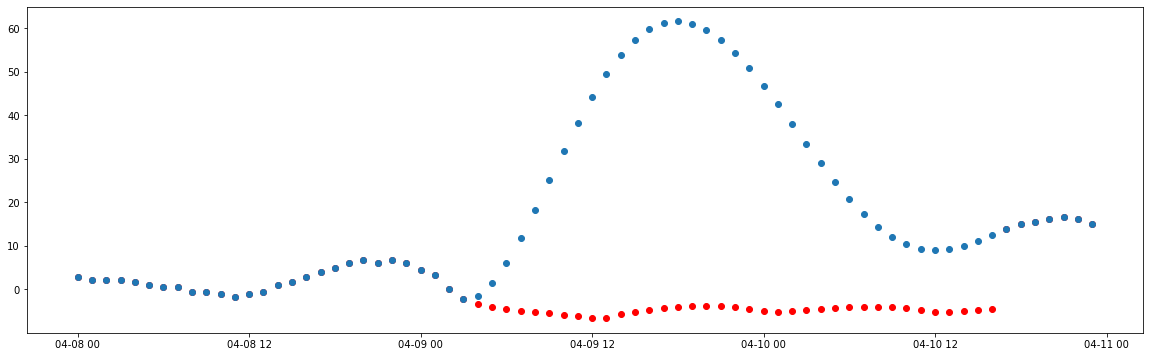

In [156]:
forecast=forecast_values.predicted_mean
forecast.rename('temp', inplace=True)
forecast=pd.DataFrame(forecast)
df_graph3=pd.concat([df_graph2,forecast])
df_graph3.sort_index(inplace=True)

dfgraph=dfint[(dfint['time']>='2006-04-08 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')]
x= dfgraph['time']
y= dfgraph['temp']
y2=df_graph3['temp']
figure(figsize=(20,6))
plt.scatter(x,y2,c='r')
plt.scatter(x,y)

plt.show()